In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1],color = 'green')

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

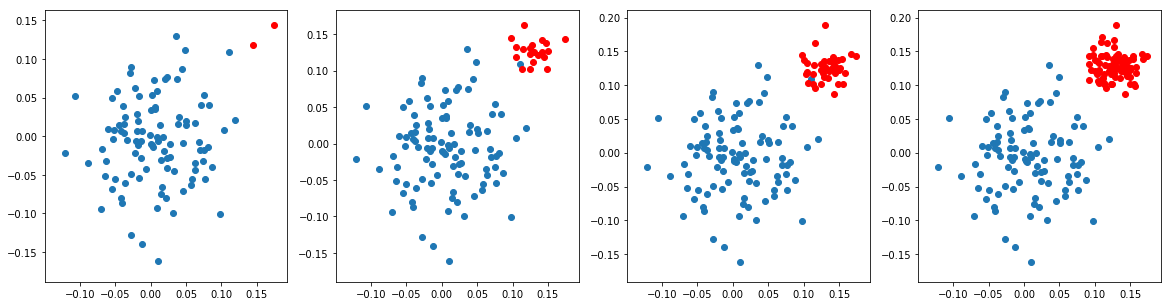

In [168]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
X = []
Y = []
X_p_list =[]
X_n_list = []
Y_p_list =[]
Y_n_list = []
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    rng=np.random.RandomState(123)
    X_p=rng.normal(0,0.05,size=(i[0],2))
    X_n=rng.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    #print(type(np.vstack((X_p,X_n))))
    #print((np.vstack((X_p,X_n)))[0])
    X.append(np.vstack((X_p,X_n)))
    Y.append(np.vstack((y_p,y_n)))
    X_p_list.append(X_p)
    X_n_list.append(X_n)
    Y_p_list.append(y_p)
    Y_n_list.append(y_n)
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

#print(len(X[0]))
#print(X_p_list[0])

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

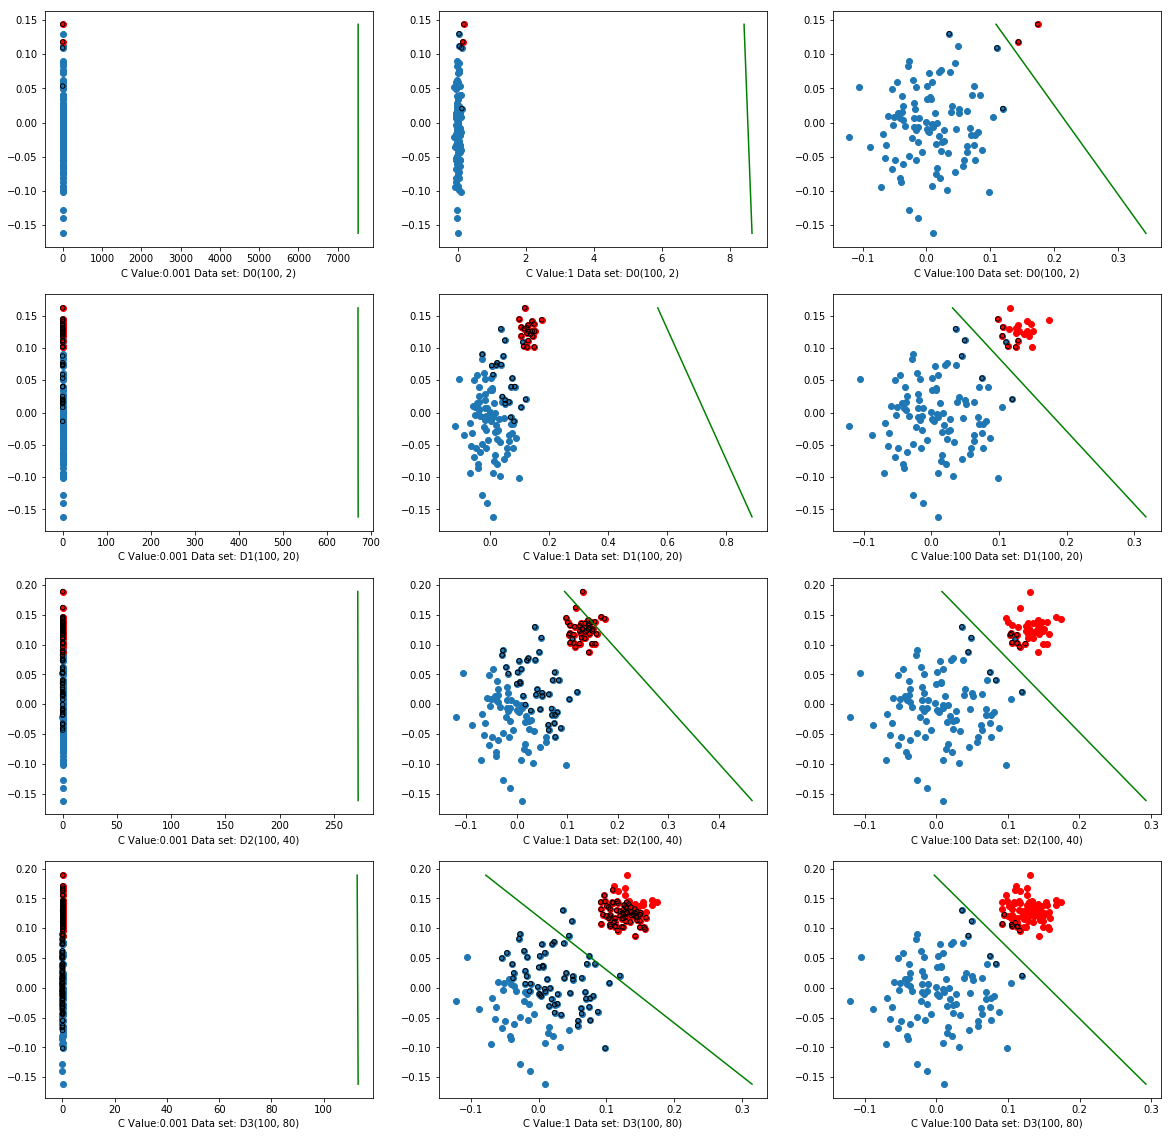

In [169]:
# Apply SVC on imbalanced data set with different re
k=0
fig =plt.figure(figsize=(20,20))
# For Each Data set. Len(X) gives no of data sets stored in X list
for i in range(len(X)):
  
    for l,c in enumerate([0.001, 1, 100]):
        clf = SVC(kernel="linear", C=c, random_state =2)
        clf.fit(X[i], Y[i])
        #print(type(clf.coef_))
        #print(clf.coef_[0])
        #print(clf.intercept_[0])
        #print(clf.get_params())
        min_y = np.min(X[i][:, 1])
        max_y = np.max(X[i][:, 1])
        #print(min_y,max_y)
        #print(clf.support_)
        #print("______")
        #print(clf.support_vectors_)
        #print("______")
        #print(clf.n_support_)
        #print("______")
        
        # Create 12 subplots to show variations of hyperplane with all combinations of c and datasets
        lbl = "C Value:" +str(c) +" Data set: D"+str(i) +str(data_ratios[i]) 
        axes = fig.add_subplot(4,3,l+k+1, label = lbl)
        draw_line(clf.coef_[0],clf.intercept_[0], min_y, max_y)
        #print(X_p_list[i][:,0])
        axes.scatter(X_p_list[i][:,0],X_p_list[i][:,1])
        axes.scatter(X_n_list[i][:,0],X_n_list[i][:,1],color='red')
        axes.set_xlabel(lbl)
        
        # Highlight support vectors with dark circles for better understanding
        # Reference: https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
        axes.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20, linewidth=1, facecolors="None", edgecolors="black",)
        
    k=k+3
    
plt.show()


# Observation:

How is the loss function affected by different values of the regularization parameter?
- As C increases, we observed that model overfits, which means a small change in data can affect your model i.e less regularized (lambda decreases) and model will be more prone to errors which increases the loss function.
- As C decreases, we observed that model underfits, which means a small change in data will not affect your model i.e more regularized (lambda increases) and model will be less prone to errors which decreases the loss function.


How the final plane or line that we get is affected by different values of regularization parameter and different count of outliers (if any).
-  With High C value, we observed the hyperplane is more capable of separating +ve and -ve data points and viceversa with low C value

Whether the model is overfitting or underfitting or is optimal at a particular value of regularization parameter.
- With High C value model overfits.And, with low C value model underfits hence we need go for an moderate value depending on the data set. Optimal hyper-parameter can be found by cross-validation.

Other Observations: C value Vs data set.

- Data set D0 (100,2): Here, data set is very much imbalanced 100 +ve pts/ 2 -ve pts hence overfitting (High C value) is very much required to separate +ve and -ve pts.

- Data set D1 (100,20): Same observation as D0 data set but better differnce between +ve/-ve pts accomplished as ration (+ve/-ve) is better than D0

- Data set D2 (100,40): Able to partially distinguish +ve / -ve with C =1

- Data Set D3 (100,80): Almost balanced dataset. C =1 underfited the model hence not useful but C =(1,100) gave better results in distingushing data pts.



## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

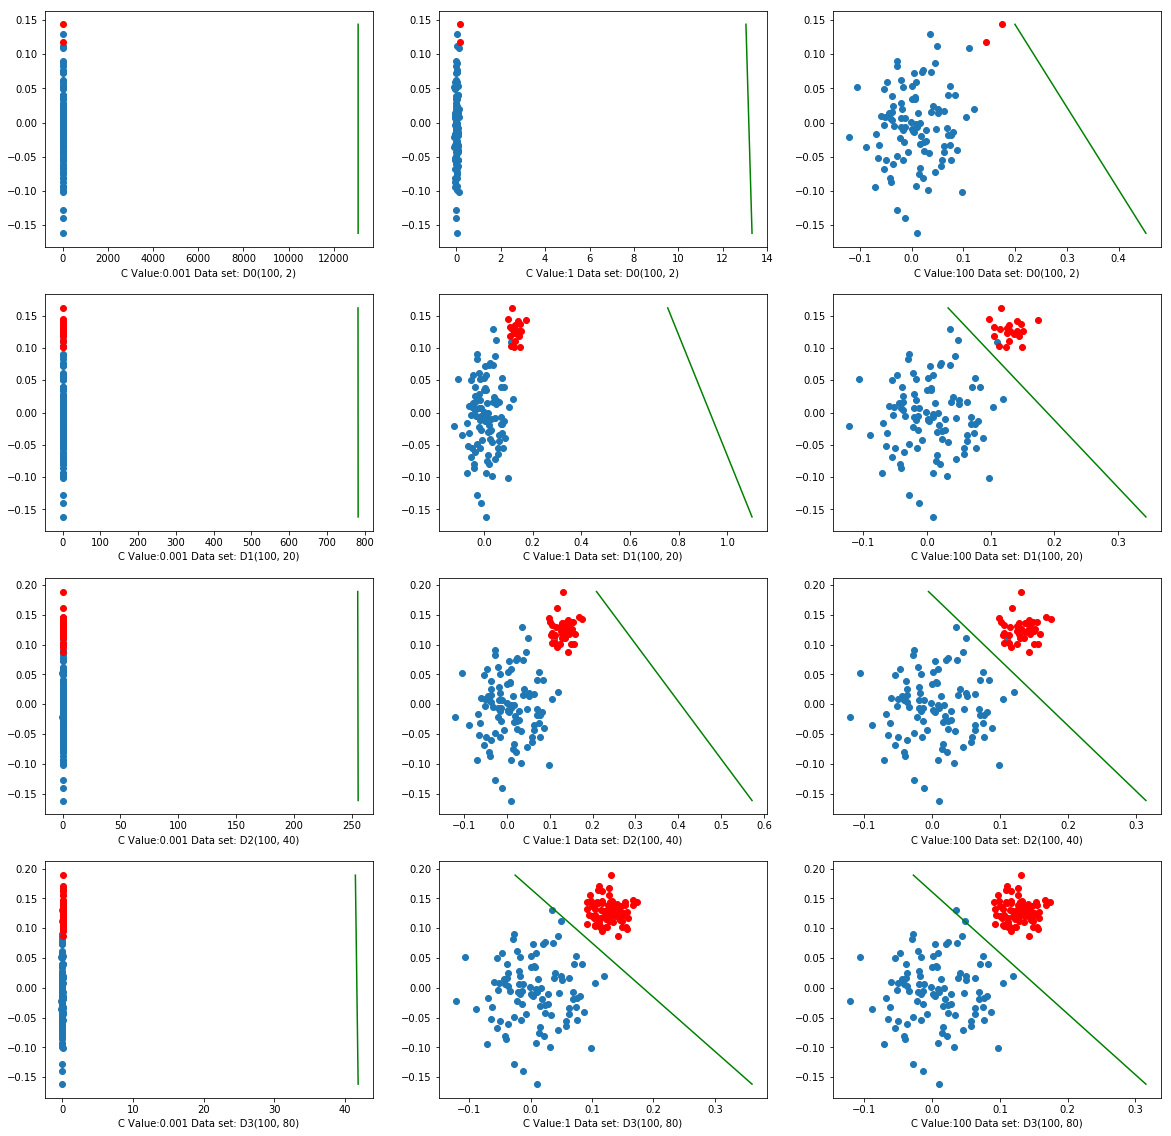

In [170]:
# here we are creating 2d imbalanced data points 
k=0
fig =plt.figure(figsize=(20,20))
for i in range(len(X)):
    
    for l,c in enumerate([0.001, 1, 100]):
        clf = LogisticRegression(C=c,random_state =2)
        clf.fit(X[i], Y[i])
        #print(type(clf.coef_))
        #print(clf.coef_[0])
        #print(clf.intercept_[0])
        #print(clf.get_params())
        min_y = np.min(X[i][:, 1])
        max_y = np.max(X[i][:, 1])
        #print(min_y,max_y)
        
        lbl = "C Value:" +str(c) +" Data set: D"+str(i) +str(data_ratios[i]) 
        axes = fig.add_subplot(4,3,l+k+1, label = lbl)
        draw_line(clf.coef_[0],clf.intercept_[0], min_y, max_y)
        #print(X_p[:,0])
        axes.scatter(X_p_list[i][:,0],X_p_list[i][:,1])
        axes.scatter(X_n_list[i][:,0],X_n_list[i][:,1],color='red')
        axes.set_xlabel(lbl)
        
        # No support vectors in Logistic Regression
       
    k=k+3
    
plt.show()


# Observation:

Almost similar results as SVM algorithm but SVM was able to perform partial distinguishment of data points for D2 Data set with C = 1 and other cases with moderate C value we were able achieve required results. By considering these points, SVM is better relatively to Logistic regression.

Other Observations as below:

Data set D0 (100,2): Here, data set is very much imbalanced 100 +ve pts/ 2 -ve pts Even overfitting (High C value) wasn't useful to separate +ve and -ve pts.

Data set D1 (100,20): Here, overfitting (High C =100 value) is very much required to separate +ve and -ve pts.

Data set D2 (100,40): Wasnt able to partially distinguish +ve / -ve with C =1 but with C =100 we could achieve it.

Data Set D3 (100,80): Almost balanced dataset. C =1 underfited the model hence not useful but C =(1,100) gave better results in distingushing data pts.

Conclusion: 
-  Best approach to model is to convert your imbalanced data set to balanced with upsampling/downsampling and run random search cv or gridsearchcv to fing best hyper parameter and use the best hyperparameter to model.